# Исследование объявлений о продаже квартир

**Описание проектной работы**

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта**

Научиться определять рыночную стоимость объектов недвижимости, выявить параметры, влияющие на стоимость. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

# Содержание

[1. Изучение исходных данных](#Изучение-исходных-данных)

[2. Предобработка данных](#Предобработка-данных)
   
[3. Добавление новых столбцов](#Добавление-новых-столбцов)
   
[4. Исследовательский анализ данных](#Исследовательский-анализ-данных)
   
[5.  Общий вывод](#Общий-вывод)


## Изучение исходных данных

[Назад к содержанию](#Содержание)

Импортируем необходимые библиотеки.

In [1]:
# импорт библиотек:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считаем данные из файла, поместим данные в датафрейм `data` и выведем первые строки таблицы методом head():

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим на количество строк в data:

In [5]:
display(data.shape[0])

23699

Выведем общую информацию методом .info()

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Первые выводы.

    - из исходных данных мы знаем, что столбец `is_apartment` - это булевый тип переменных, но в отчете отображается как `object`.
    - также `first_day_exposition` скорее всего должен быть как объект типа `date`, но в отчете это `object`.
    - видим, что есть пропуски в данных.
Будем держать это на заметке и отработаем в ходе анализа.

Построим общую гистограмму для всех столбцов таблицы:

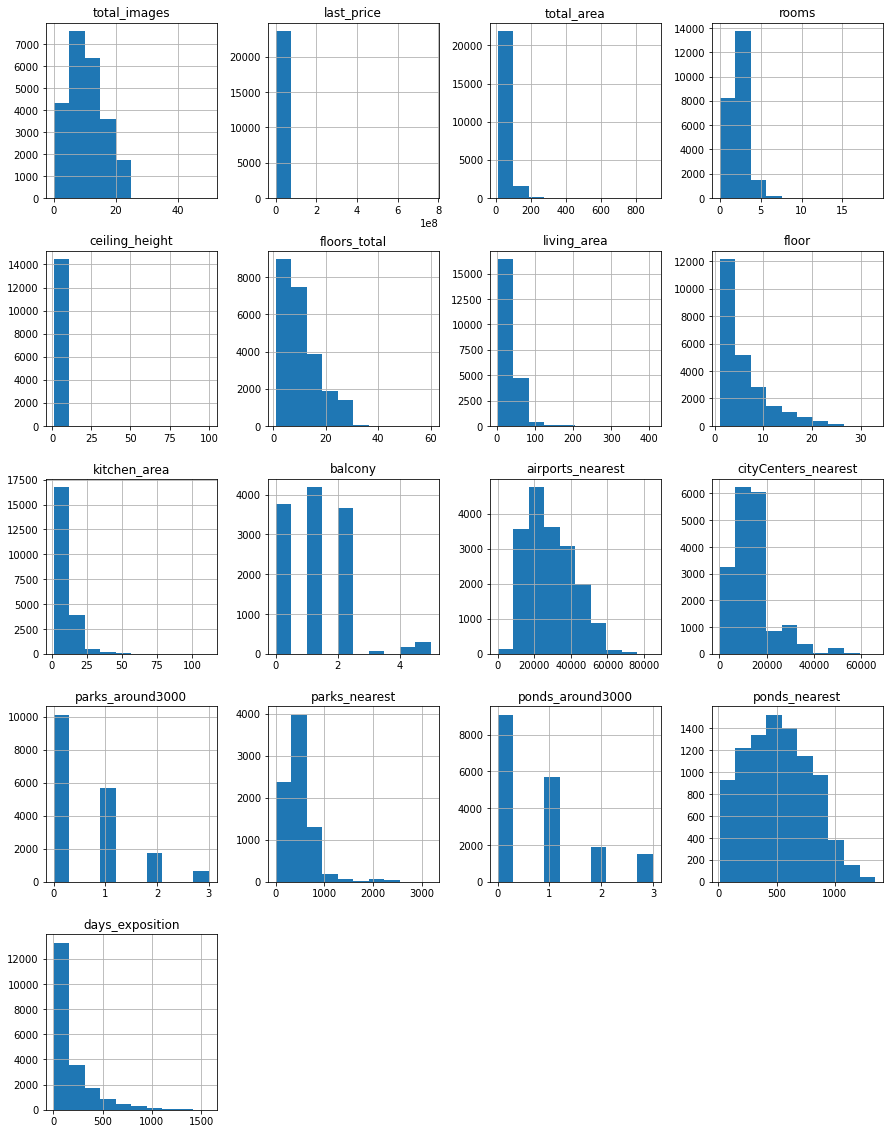

In [7]:
data.hist(figsize=(15, 20));

Данных много. Пока не будем делать какие-то конкретные выводы. На графиках можно наблюдать выбросы данных

Посмотрим еще на "сырые" данные, применив метод describe():

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Бросается в глаза:

    - максимальная высота потолка - 100м.
    - минимальная высота потолка - 1м.
    - количество этажей в здании - 60.
    - минимальное кол-во комнат - 0
    - минимальное кол-во этажей - 1 (хотя возможно это попал в объявление частный дом)
    - минимальная жилая площадь - 2 м2
    - минимальное расстояние до ближайшего аэропорта в метрах - 0
    - минимальное расстояние до ближайшего парка (м) - 1


## Предобработка данных

[Назад к содержанию](#Содержание)

### Заполнение пропусков:

In [9]:
# узнаем кол-во NaN в data:

data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Попробуем проанализировать возможные причины пропусков в столбцах и примем решение по заполнению недостаающих данных:

   - `ceiling_height` - высота потолков - возможно высота средняя по дому и указана в других источниках, пока не сможем принять решение что делать с пропусками, далее в анализе вернемся к этому столбцу;
   - `floors_total` - всего этажей в доме - возможно одноэтажные дома, либо есть некий паспорт объекта где это указано, также пока не можем заполнить пропуски;
   - `living_area` - жилая площадь в квадратных метрах (м²) - могут быть аппартаменты, для замены пропусков найдем соотношение между средней жилой площади к средней общей площади и умножим на среднюю общую площадь;
   - `is_apartment` - апартаменты - скорее всего не указана информация в связи с тем, что это не аппартаменты, а квартира, заменим `NaN` на `False`;
    - `kitchen_area` - площадь кухни в квадратных метрах - возможно это студии или была перепланировка, для замены пропусков найдем соотношение средней кухонной площади к средней общей площади и умножим на среднюю общую площадь;
   - `balcony` - число балконов - если пропуски, вполне вероятно, что балконов в квартире нет, заменим `NaN` на `0`;
   - `locality_name` - название населённого пункта - сейчас не сможем предположить, позже когда будем подробнее разбирать этот столбец возможно появится какое-то решение, возможно человеческий фактор, чтобы избавиться от пропусков заменим `NaN` на `'-'` так не будет пропусков и будем знать, что изначально данные отсутствовали;
   - `airports_nearest` - расстояние до ближайшего аэропорта в метрах - возможно аэропорт слишком далеко, населенный пункт не находится в Питере или технические ошибки, связанные с выгрузкой данных с сервера, т.к. это относится к картографическим данным, пока оставим пропуски как есть;
   - `cityCenters_nearest` - расстояние до центра города - возможно это не Питер, слишком далеко или технические ошибки при выгрузке картографических данных, оставим пропуски как есть;
   - `parks_around3000` - число парков в радиусе 3 км - возможно парков попросту нет, оставим пропуски как есть;
   - `parks_nearest` - расстояние до ближайшего парка - снова возможно парков нет, оставим пропуски как есть;
   - `ponds_around3000` - число водоёмов в радиусе 3 км - аналагично водоемов может не быть, оставим пропуски как есть;
   - `ponds_nearest` - расстояние до ближайшего водоёма - возможно их нет, оставим пропуски как есть;
   - `days_exposition` - сколько дней было размещено объявление (от публикации до снятия) - квартиры могут находиться в продаже, поэтому отсутствуют данные, оставим пропуски как есть.

Заменим пропуски в столбце с жилой площадью следующим образом. Найдем соотношение между средней жилой площадью и средней общей площадью. Для этого найдем среднюю жилую площадь и среднюю общую площадь: 


In [10]:
# средняя жилая площадь:
living_area_mean = data['living_area'].mean() 

# средняя общая площадь:
total_area_mean = data['total_area'].mean() 

# соотношение между средней жилой площади к средней общей площади:
k_living_total_mean = living_area_mean / total_area_mean 


print('Средняя жилая площадь, м2:', living_area_mean)
print('Средняя общая площадь, м2:', total_area_mean)
print('Соотношение между средней жилой площади к средней общей площади:', k_living_total_mean)

Средняя жилая площадь, м2: 34.457852427601395
Средняя общая площадь, м2: 60.34865099793241
Соотношение между средней жилой площади к средней общей площади: 0.5709796633031937


Теперь заменим пропуски в столбце с жилой площадью произведением средней общей площади на полученное соотношение:


In [11]:
data['living_area'] = data['living_area'].fillna(total_area_mean * k_living_total_mean)

In [12]:
data['living_area'].isna().sum()

0

Получилось. Теперь заменим пропуски в столбце `is_apartment` на `False` и проверим:

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Заменим пропуски в столбце с площадью кухни также, как и в случае с жилой площадью: найдем коэффициент соотношения средней кухонной площади к средней общей площади и умножим на среднюю общую площадь. Среднюю общую площадь вычислили ранее: 

In [14]:
# средняя кухонная площадь:
kitchen_area_mean = data['kitchen_area'].mean() 

# соотношение между средней кухонной площади к средней общей площади:
k_kitchen_total_mean = kitchen_area_mean / total_area_mean 

print('Средняя кухонная площадь, м2:', kitchen_area_mean)
print('Соотношение между средней кухонной площади к средней общей площади:', k_kitchen_total_mean)

Средняя кухонная площадь, м2: 10.569807198543485
Соотношение между средней кухонной площади к средней общей площади: 0.17514570787846798


Теперь заменим пропуски в столбце с площадью кухни на произведение средней общей площади на полученный коэффициент соотношения:

In [15]:
data['kitchen_area'] = data['kitchen_area'].fillna(total_area_mean * k_kitchen_total_mean)
data['kitchen_area'].isna().sum()

0

Получилось!

Заполним нулем отсутствующие значения в столбце 'balcony':

In [16]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Пропуски в столбце `locality_name` заменим на `'-'`:

In [17]:
data['locality_name'] = data['locality_name'].fillna('-')
data['locality_name'].isna().sum()

0

Итак, где смогли избавились от пропусков. 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

### Изменение типа столбцов

Ранее мы уже обнаружили столбцы с неверным форматом данных. Изменим тип данных в этих столбцах. Еще раз вызовем метод `info()` к нашему датасету:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Обработка столбца `is_apartment`

Посмотрим на столбец `is_apartment`:

In [20]:
data['is_apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

Видим, что столбец имеет булевый тип данных, хотя ранее был object. Это связано с тем, что были пропуски в данных и мы заменили на 0 отсутствующие данные. 

Приведение данного столбца к единому булевому типу потребуется нам в дальнейшем для анализа. В противном случае возникли бы ошибки при работе со значениями разных типов данных.

Считаем, что данный столбец обработан.

#### Обработка столбца `first_day_exposition`

Взглянем еще раз на столбец `first_day_exposition`:

In [21]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Тип данных object. Необходимо привести тип данных в этом столбце к типу date. Изменяем тип для того, чтобы в последующем мы смогли  обрабатывать временные данные.

In [22]:
# посмотрим на формат записи:

data['first_day_exposition'] 

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

Преобразуем формат даты с помощью метода `to_datetime()`:

In [23]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
display(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Готово, считаем, что столбец 'first_day_exposition' отработан.

#### Обработка столбца `balcony`

Изменим тип столбца `balcony`. Он должен принимать значения типа `int`:

In [24]:
data['balcony'] = pd.to_numeric(data['balcony'])

data['balcony'] = data['balcony'].astype('int')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

В остальных столбцах типы данных верные.

На этом считаем, что привели столбцы к нужным типам данных.

#### Обработка дубликатов

Поищем дубликаты в данных.

In [25]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Поищем теперь неявные дубликаты. Они могут быть в столбце `locality_name` - название населённого пункта. Поищем дубликаты в этом столбце:

In [26]:
data['locality_name'].duplicated().sum()

23334

Очень много дубликатов. Попробуем применить метод value_counts(), чтобы посмотреть, какие именно названия повторяются:

In [27]:
data['locality_name'].value_counts().head(40)

Санкт-Петербург              15721
посёлок Мурино                 522
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
Колпино                        338
посёлок Парголово              327
Гатчина                        307
деревня Кудрово                299
Выборг                         237
Петергоф                       201
Сестрорецк                     183
Красное Село                   178
Кудрово                        173
деревня Новое Девяткино        144
Сертолово                      142
Ломоносов                      133
Кириши                         125
Сланцы                         112
Волхов                         111
Тосно                          104
Кингисепп                      104
Кронштадт                       96
Никольское                      93
Коммунар                        89
Сосновый Бор                    87
Кировск                         84
Отрадное                        80
посёлок Бугры       

Тоже особо не помогает. Сделаем список с уникальными значениями:

In [28]:
list(data['locality_name'].unique())

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [29]:
len(list(data['locality_name'].unique()))

365

В списке теперь видны такие записи как "посёлок" и "поселок", "поселок городского типа". Очень похоже на дубликаты. Избавимся от всех дополнительных слов - поселок, деревня, село и т.п. Создадим вспомогательный список, в который поместим все такие слова, далее методом replace удалим все не нужное и оставим только наименования населенных пунктов. Вряд ли в Ленинградской области есть город Пушкин и деревня Пушкин или поселок. 

In [30]:
list_locality = [   # список слов, подлежащих удалению
    'поселок', 
    'посёлок', 
    'поселок городского типа', 
    'городского типа', 
    'коттеджный поселок', 
    'коттеджный',
    'городской поселок',
    'городской',
    'деревня',
    'село',
    'садоводческое некоммерческое товарищество',
    'садовое товарищество',
    'при железнодорожной станции',
    'станции',
    'имени',
]


In [31]:
data['locality_name'] = data['locality_name'].replace(list_locality, '', regex=True)

Проверим что получилось:

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', '  Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', '  Красный Бор', 'Гатчина', ' Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', '  Лебяжье', '  Сиверский', ' Молодцово',
       '  Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', '  Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', '  Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодёжное',
       'Тихвин', ' П

Получили дополнительные пробелы. Избавимся от них:

In [33]:
data['locality_name'] = data['locality_name'].str.strip()

Проверим что получилось:

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Избавились от лишних слов. Проверим еще раз наш датафрейм на наличие дубликатов:

In [35]:
data.duplicated().sum()

0

На этом будем считать что обработали столбец locality_name - унифицировали наименования населенных пунктов.

#### Обработка выбросов и редких значений

На первом этапа анализа мы обнаружили странные значения. Вызовем метод describe и проанализируем еще раз получившийся датафрейм:




In [36]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,21.127391,4.885249,5.614434,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.400000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,31.100000,4.000000,10.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выбивающиеся значения:   

   - минимальная и максимальная стоимость квартиры;
   - максимальная высота потолка - 100м.
   - общая площадь квартиры в квадратных метрах (м²) - минимум -12, максимум -900
   - минимальная высота потолка - 1м.
   - количество этажей в здании - 60.
   - минимальное кол-во комнат - 0
   - минимальное кол-во этажей - 1 (хотя возможно это попал в объявление частный дом)
   - минимальная жилая площадь - 2 м2
   - минимальное расстояние до ближайшего аэропорта в метрах - 0
   - минимальное расстояние до ближайшего парка (м) - 1

#####  Столбец со стоимостью квартиры

Вызовем метод describe():

In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видим аномально-низкую стоимость квартиры

Построим `boxplot` для столбца `last_price`:

<AxesSubplot:>

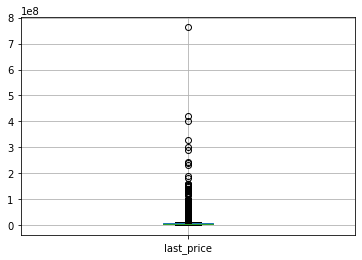

In [38]:
data.boxplot(column='last_price')

Видим аномально-большую стоимость. Выбивается из общего разброса цен. Эта квартира будет искажать нам анализ. Вполне возможно, что это квартира с самой большой площадью.Найдем объявление с этой стоимостью:

In [39]:
data.query('last_price == last_price.max()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,10.569807,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Странно, что это самая дорогая квартира, но не с самой большой площадью. Считаю, что нужно удалить это объявление из нашего датафрейма, чтобы не искажать показатели:

In [40]:
data = data.query('last_price != last_price.max()')
data.query('last_price == last_price.max()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Удалили объявление с самой большой стоимостью. Посмотим теперь как это сказалось, вызовем еще раз describe():

In [41]:
data['last_price'].describe()

count    2.369800e+04
mean     6.509628e+06
std      9.715106e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      4.200000e+08
Name: last_price, dtype: float64

Отклонение немного уменьшилось. Построим boxplot():

<AxesSubplot:>

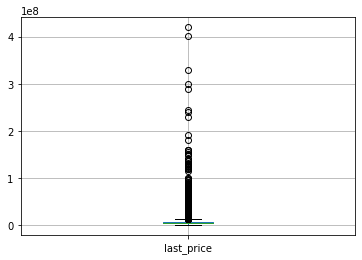

In [42]:
data.boxplot(column='last_price')

Видны выбросы, пока их трогать не будем.

Попробуем разобраться со слишком низкой стоимостью квартир. Отсортируем объявления по возрастанию стоимости:

In [43]:
data.sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,False,False,40.500000,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,False,False,6.000000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,34.457852,3,False,False,False,10.569807,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,34.457852,1,False,False,False,10.569807,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01,1,NaN,5.0,17.300000,4,False,False,False,8.500000,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.700000,6,False,False,False,30.200000,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.000000,5,False,False,False,70.000000,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.000000,5,False,False,False,40.000000,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.000000,9,False,False,False,24.000000,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0


Обнаружили квартиру с подозрительно-низкой стоимостью. 

Квартира площадью 109м2 и стоимостью 12190 не похоже на правду. Удалим это объявление:

In [44]:
data = data.query('last_price != last_price.min()')
data.query('last_price == last_price.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,34.457852,3,False,False,False,10.569807,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,False,False,6.000000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалили объявление с самой низкой стоимостью. Построим гистограмму распределения стоимости:

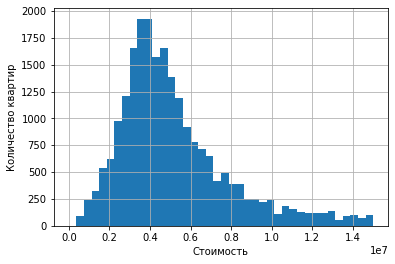

In [45]:
data['last_price'].hist(bins=40, range=(0, 15000000))
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир');

Из столбца удалили объявление с аномально высокой и низкой стоимостью. Наблюдаем разброс цен, пока оставим как есть.

##### Столбец с высотами потолков `ceiling_height`

Построим `boxplot` для столбца `ceiling_height` для понимания того какие высоты потолков к нам попали:

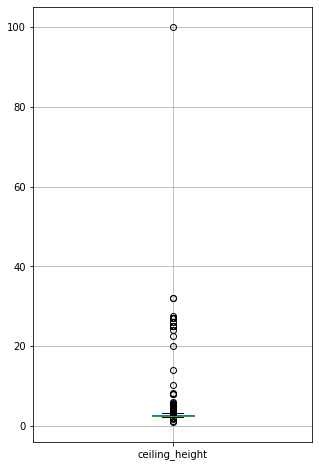

In [46]:
data.boxplot(column='ceiling_height', figsize=(5, 8));

Видим потолки, выходящие за рамки нормальных значений ящика с "усами". 

Воспользуемся методом describe() для столбца с высотами потолков:

In [47]:
data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолка равна порядка 2,8м, отклонение 1,26. Соответственно есть аномальные значения. Подсчитаем медианное значение высоты потолка:
    

In [48]:
data['ceiling_height'].median()

2.65

Подсчитаем межквартильный размах и длину верхнего и нижнего "уса" 


In [49]:
Q1 = data['ceiling_height'].quantile(0.25)
Q3 = data['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
median = data['ceiling_height'].median()
lower = round(Q1 - 1.5 * IQR, 2)
upper = round(Q3 + 1.5 * IQR, 2)
print('Нижний ус = ', lower)
print('Верхний ус =', upper)
print('Медиана =', median)

Нижний ус =  2.1
Верхний ус = 3.22
Медиана = 2.65


Таким образом, будем считать, что потолки выше 3.22м и ниже 2.1м являются выбросами. Подсчитаем сколько объявлений с такими потолками:

In [50]:
display(data.query('ceiling_height > @upper').shape[0])
data.query('ceiling_height < @lower').shape[0]

811

14

Посмотрим более детально какие встречаются потолки, которые попали в выброс. 
Сперва посмотрим на высокие потолки, посмотрим на уникальные значения:

In [51]:
display(sorted(data.query('ceiling_height > @upper')['ceiling_height'].unique()))

[3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37,
 4.4,
 4.45,
 4.5,
 4.65,
 4.7,
 4.8,
 4.9,
 5.0,
 5.2,
 5.3,
 5.5,
 5.6,
 5.8,
 6.0,
 8.0,
 8.3,
 10.3,
 14.0,
 20.0,
 22.6,
 24.0,
 25.0,
 26.0,
 27.0,
 27.5,
 32.0,
 100.0]

Отметки свыше 10,3м до 32м скорее всего записаны с ошибкой. Разделим на 10 отметки, начиная с 10.3м до 32м: 

In [52]:
data.loc[(data['ceiling_height'] >= 10.3) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] / 10


Построим диаграмму размаха еще раз:

<AxesSubplot:>

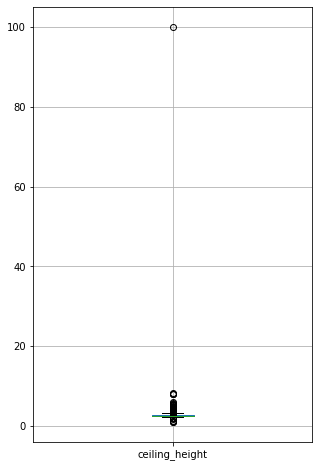

In [53]:
data.boxplot(column='ceiling_height', figsize=(5, 8))

Убедились в том, что отсутствуют потолки в диапазоне от 10.3м до 32м.
Следующим шагом присвоим всем потолкам свыше 3.22м значение верхнего уса 3.22м:

In [54]:
data.loc[data['ceiling_height'] > upper, 'ceiling_height'] = upper

Проверим на диаграмме размаха:

<AxesSubplot:>

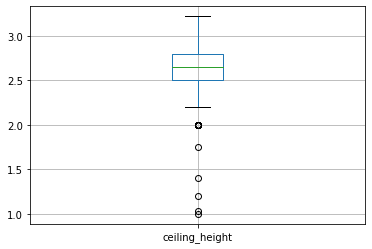

In [55]:
data.boxplot(column='ceiling_height')

Убедились в том, что "откусили" потолки, выходящие за принятую верхнюю границу.

Теперь обработаем потолки, выходящие за нижнюю границу 2.1м. Сперва посмотрим на них:

In [56]:
data.query('ceiling_height < @lower')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,False,False,False,6.500000,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,False,False,False,6.000000,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,False,False,False,8.800000,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,False,False,False,5.200000,0,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,34.457852,5,False,False,False,10.569807,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,False,False,False,10.100000,0,Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
15061,19,5600000.0,56.40,2018-05-11,2,1.40,14.0,32.400000,5,False,False,False,9.100000,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.900000,2,False,False,False,12.000000,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5.0,20.000000,5,False,False,False,6.000000,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.400000,5,False,False,False,8.340000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Теперь "откусим" нижнюю границу - потолкам ниже 2.1м присвоим значение нижнего уса 2.1м:

In [57]:
data.loc[data['ceiling_height'] < lower, 'ceiling_height'] = lower

Снова построим диаграмму размаха:

<AxesSubplot:>

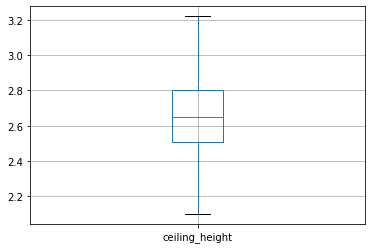

In [58]:
data.boxplot(column='ceiling_height')

In [59]:
data['ceiling_height'].isna().sum()

9194

Теперь присвоим потолкам со значениями NaN медианное значение:

In [60]:
data['ceiling_height'] = data['ceiling_height'].fillna(median)

Проверяем кол-во пропусков:

In [61]:
data['ceiling_height'].isna().sum()

0

Пропуски отсутствуют. Вызовем метод describe():

In [62]:
data['ceiling_height'].describe()

count    23697.000000
mean         2.685920
std          0.172858
min          2.100000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.220000
Name: ceiling_height, dtype: float64

* В итоге избавились от пропусков и выбросов в столбце с высотами потолков. Среднее отклонение минимальное. Для этого посмотрели на разброс данных, обнаружили выбросы и неточности в записях. Неточности в записях - такие как 32м, 27м - разделили на 10. Для аномально высоких и низких потолков использовали медианное значение 2.65м. Считаем, что столбец с высотами потолков отработан. 

##### Столбец с количеством этажей в доме `floors_total`

Теперь приступим к столбцу с количеством этажей в доме. Ранее мы оставили пропуски как есть. Подсчитаем кол-во пропусков:

In [63]:
data['floors_total'].isna().sum()

86

Заменим пропуски этажом квартиры:


In [64]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()

0

Посмотрим на данные, вызвав метод describe():

In [65]:
data['floors_total'].describe()

count    23697.000000
mean        10.670887
std          6.595422
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Большое среднее отклонение - видимо много неверных данных. И 60 этажей для Питера многовато - вряд ли кто-то в Лахта-центре продаёт квартиру. Построим диаграмму размаха:

<AxesSubplot:>

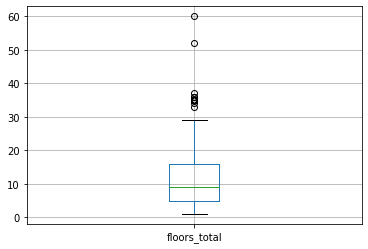

In [66]:
data.boxplot(column='floors_total')

Наблюдаем выбросы.Посмотрим на объявление в 60-этажном доме:

In [67]:
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


В Кронштадте нет таких высоких домов. Изучим в Википедии самые высокие дома в Питере: https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0

Исходя из статьи, получаем самое высокое здание в 37 этажей. Но даже 37 этажей выходит за рамки верхнего "уса" по диаграмме размаха. Примем во внимание статью на Википедии и будем считать, что все здания выше 37 этажей - это выбросы. Посмотрим на уникальные значения имеющихся в датасете этажей:

In [68]:
sorted(data['floors_total'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 52.0,
 60.0]

Выше 37 этажей только 2 объявления. 60 этажей вполне возможно записаны ошибочно - это возможно 6-ти этажный дом. Посмотрим на 52-х этажный дом:

In [69]:
data.query('floors_total == 52')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Не прослеживается никакая связь с другими столбцами. Примем для этого объявления, что это 37-этажный дом.

Заменим объявления с 60 и 52 этажными домами на 37 этажный:

In [70]:
data['floors_total'] = data['floors_total'].replace(52, 37, regex=True)
data['floors_total'] = data['floors_total'].replace(60, 37, regex=True)

Проверим что получилось - выведем диаграмму размаха:

<AxesSubplot:>

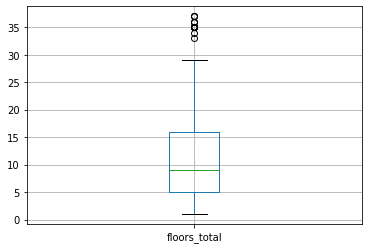

In [71]:
data.boxplot(column='floors_total')

* Итак, в данном пункте исследования мы выявили аномальные значения в столбце с высотами здания. Слишком высокие здания привели к 37 этажным домам. 37 этажей взяли как самое высокое здание в Питере. Удалили пропуски в столбце. Будем считать, что данный столбец у нас очещен и готов для дальнейшего исследования. 

##### Обработка аномалий в других столбцах

Посмотрим на оставшиеся столбцы методом describe():

In [72]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23697.000000,2.369700e+04,23697.000000,23697.000000,23697.000000,23697.000000,23697.000000,23697.000000,23697.000000,23697.000000,18155.000000,18178.000000,18179.000000,8077.000000,18179.000000,9109.000000,20516.000000
mean,9.858210,6.509902e+06,60.332265,2.070431,2.685920,10.669283,34.448860,5.891379,10.568544,0.591045,28793.455081,14192.116790,0.611365,490.760802,0.770174,517.954770,180.904270
std,5.682428,9.715219e+06,35.585844,1.077975,0.172858,6.586602,21.081826,4.883805,5.611303,0.959287,12631.419896,8608.444628,0.802107,342.342246,0.938234,277.724689,219.732957
min,0.000000,4.300000e+05,12.000000,0.000000,2.100000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,18583.500000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,31.100000,4.000000,10.000000,0.000000,26726.000000,13100.000000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.800000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37274.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,4.200000e+08,900.000000,19.000000,3.220000,37.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Обработаем столбец с общей площадью квартир. Построим гистограмму по общей площади квартир:     

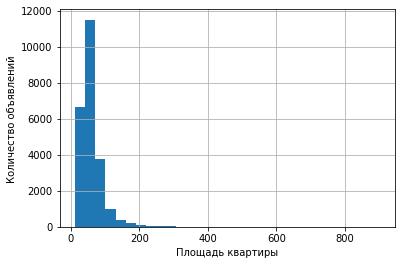

In [73]:
data['total_area'].hist(bins=30)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество объявлений');

На графике видим, что основная масса объявлений с общей площадью не превышает 200 - 300м2. Площади квартир больше 200м2 могут существовать, но в нашем случае - это явная аномалия, которая будет портить нам статистику.

Удалим все объявления площадью более 200м2:  

In [74]:
data = data.loc[data['total_area'] <= 200]

Проверим, построим еще раз гистограмму:

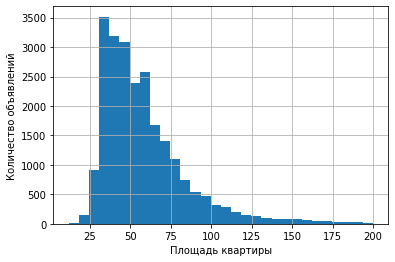

In [75]:
data['total_area'].hist(bins=30)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество объявлений');

Итак, избавились от квартир площадью более 200 м2. 

Обработаем столбец с количеством комнат. Построим гистограмму для столбца с количеством комнат:     


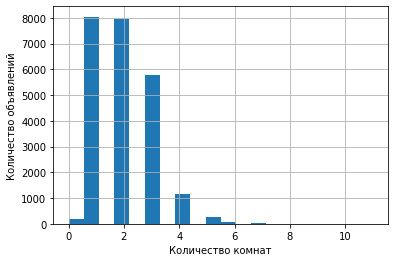

In [76]:
data['rooms'].hist(bins=20)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений');

На графике видно, что большинство квартир в пределах 5-ти 6-ти комнат. Удалим все объявления где более шести комнат:

In [77]:
data = data.loc[data['rooms'] <= 6]

Проверим на диаграмме размаха:

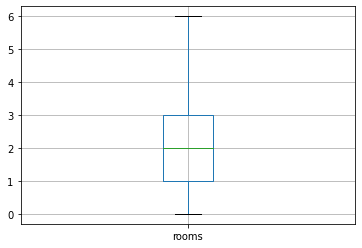

In [78]:
data.boxplot(column='rooms');

Итак, удалили все объявления, в которых было более 6 комнат.

Значения в остальных столбцах выглядят правдоподобно. Оставим как есть.

На этом закончим с предобработкой исходного датафрейма. Мы очистили исходный датафрейм от выбросов и редких значений, заполнили пропуски в данных где это смогли сделать, привели столбцы к нужным типам данных для последующей работы со столбцами, избавились от неявных дубликатов в данных. Считаем, что полученный data очищен и готов для последующих исследований.

## Добавление новых столбцов

[Назад к содержанию](#Содержание)

Добавим в датафрейм столбец со стоимостью квадратного метра. Для этого разделим стоимость квартиры на общую площадь:

In [79]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,False,False,10.569807,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим столбец с днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [80]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,False,False,10.569807,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1


Теперь добавим столбец с месяцем публикации объявления:

In [81]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,False,False,10.569807,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6


Теперь добавим столбец с годом публикации объявления:

In [82]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,False,False,10.569807,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Добавим столбец с типом этажа квартиры: «первый», «последний», «другой».

Для этого создадим функцию, которая будет сравнивать этажи и возвращать значения:

In [83]:
def type_floor(data):
    if data['floor'] == data['floors_total']:
        return 'последний'
    elif data['floor'] == 1:
        return 'первый'
    elif (data['floor'] != data['floors_total']) & (data['floor'] != 1):
        return 'другой'

In [84]:
data['type_floor'] = data.apply(type_floor, axis=1)

In [85]:
data['type_floor'].value_counts()

другой       17212
последний     3364
первый        2871
Name: type_floor, dtype: int64

Следующим шагом найдем расстояние до центра города в километрах и поместим значения в отдельном столбце

In [86]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

In [87]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,False,False,10.569807,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


Итак, все дополнительные столбцы добавлены. Приступим к анализу.

## Исследовательский анализ данных

[Назад к содержанию](#Содержание)

### Построим гистограммы для следующих столбцов:

   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - этаж квартиры;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего аэропорта;
   - расстояние до ближайшего парка;
   - день и месяц публикации объявления

И проанализируем их.

   **Общая площадь:**

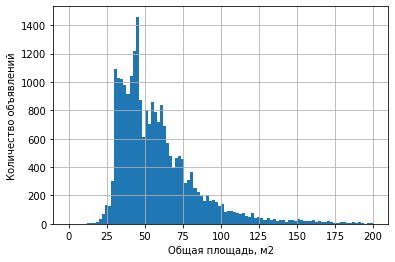

In [88]:
data['total_area'].hist(bins=100, range=(0, 200))
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество объявлений');

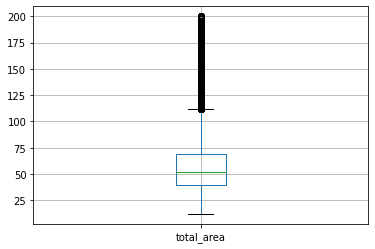

In [89]:
data.boxplot(column='total_area');

Большинство предлагаемых квартир площадью в пределах 100м2. Больше всего квартир с общей площадью порядка 40 - 45м2 - видимо стандартные однокомнатные квартиры предлагают чаще.

**Жилая площадь:**

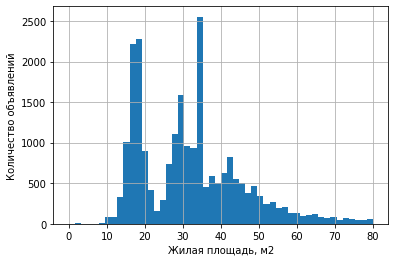

In [90]:
data['living_area'].hist(bins = 50, range=(0, 80))
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество объявлений');

Большинство квартир с жилой площадью чуть менее 20м2. Поменьше объявлений с жилой площадью порядка 30м2. Распределение графика похоже на график с общей площадью.

**Площадь кухни:**

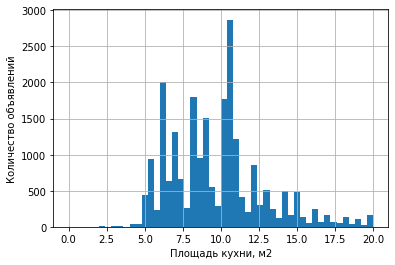

In [91]:
data['kitchen_area'].hist(bins = 50, range=(0, 20))
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество объявлений');

Большинство кухонь лежат в диапазоне от 6 - 11м2. 

**Цена объекта:**

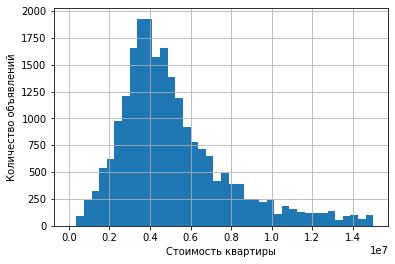

In [92]:
data['last_price'].hist(bins=40, range=(0, 15000000))
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений');

Для удобства чтения графика разделим значения в столбце 'last_price' на 1млн:


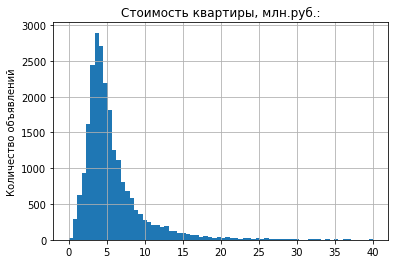

In [93]:
fig, ax = plt.subplots()

ax.hist(data['last_price'] / 1000000, bins = 70, range = (0, 40))
ax.set_title('Стоимость квартиры, млн.руб.:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

На графике видим, что в основном стоимость квартир не превышает 20 млн. рублей. Построим еще диаграмму размаха:

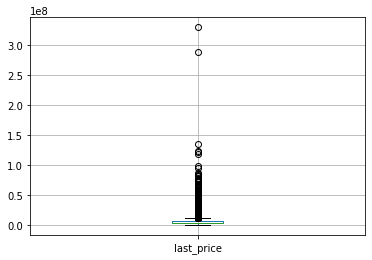

In [94]:
data.boxplot(column = 'last_price');

Из полученной гистограммы и диаграммы рзмаха сделаем вывод о том, что квартиры стоимостью более 15 млн. рублей являются аномально-высокими. Удалим все объявления свыше 15 млн. рублей:

In [95]:
data = data.loc[data['last_price'] <= 15000000]


Проверим:

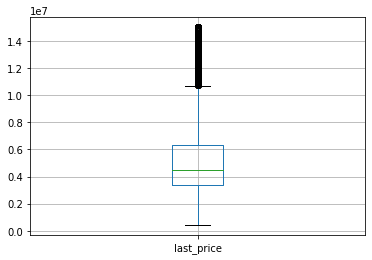

In [96]:
data.boxplot(column = 'last_price');

In [97]:
data['last_price'].describe()

count    2.247500e+04
mean     5.154874e+06
std      2.705933e+06
min      4.300000e+05
25%      3.359000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

Средняя стоимость квартиры составляет 5 млн. руб.

**Количество комнат:**

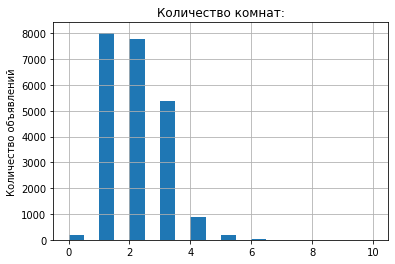

In [98]:
fig, ax = plt.subplots()

ax.hist(data['rooms'], bins = 20, range = (0, 10))
ax.set_title('Количество комнат:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

В основном продают однушки и двушки. Трехкомнатные квартиры продают чуть реже. Квартиры с количеством комнат больше трех продают крайне редко.

**Высота потолков:**

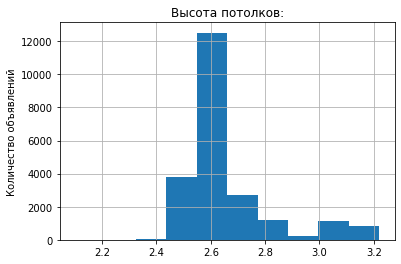

In [99]:
fig, ax = plt.subplots()

ax.hist(data['ceiling_height'], range = (lower, upper))
ax.set_title('Высота потолков:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

На этапе предобработки данных поработали с этими данными. Большинство объявлений с высотой потолка 2.6м. 

**Этаж квартиры:**

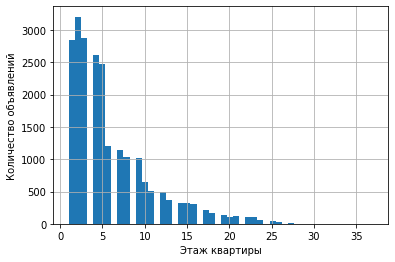

In [100]:
data['floor'].hist(bins=50, range=(1, 37))
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объявлений');

Изменим масштаб:

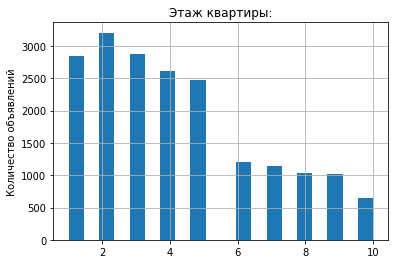

In [101]:
fig, ax = plt.subplots()

ax.hist(data['floor'], bins=20, range=(1, 10))
ax.set_title('Этаж квартиры:')
plt.ylabel('Количество объявлений');
ax.grid()

plt.show()

В большинстве объявлений квартиры расположены с 1-го по 5-ый этаж. Больше всего предложений на 2-ом этаже. Такое ощущение, что большинство квартир расположены в старых пятиэтажках. Далее мы еще посмотрим на этажность дома, проверим эту догадку.

**Тип этажа квартиры («первый», «последний», «другой»):**

Здесь более удобней будет построить диаграмму в виде "пирога":

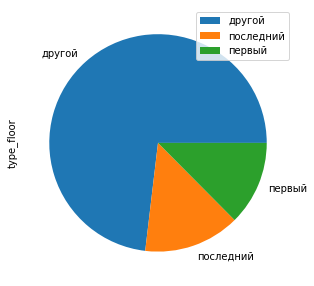

In [102]:
data['type_floor'].value_counts().plot(y='type_floor', kind = 'pie', figsize=(5, 5), legend=True);

Построим еще обычную гистограмму, что бы в явном виде были видны отличия между первым и последним этажом:

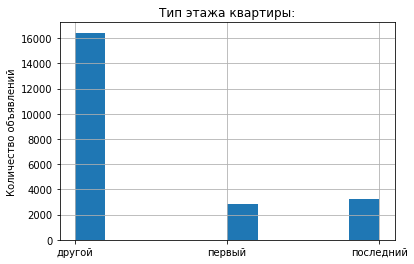

In [103]:
fig, ax = plt.subplots()

ax.hist(data['type_floor'])
ax.set_title('Тип этажа квартиры:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Меньше всего объявлений на первом этаже - это весьма логично, т.к. на первом этаже обычно расположены арендуемые помещения под разные услуги, например, салоны, кафе, магазины и т.п. В новостройках первые этажи вообще не предназначены в качестве жилого помещения, толька как коммерческая недвижимость. Видимо сюда попали одноэтажные дома. Возможно также квартиры в старых домах, где действительно квартиры расположены на первых этажах. Но таких предложений меньше всего.

Чуть больше предложений на последних этажах. Действительно на последних этажах кварир должно быть меньше от общего количества квартир на остальных этажах.

И больше всего предложений, в которых квартиры расположены между первым и последним этажами - на других этажах. Исходя из первых двух рассуждений, действительно так и должно быть.

**Общее количество этажей в доме:**

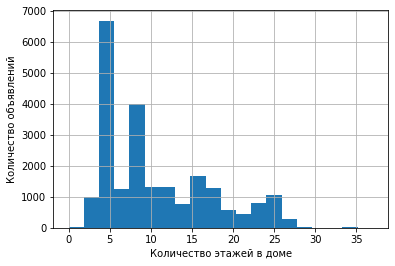

In [104]:
data['floors_total'].hist(bins=20, range=(0, 37))
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений');

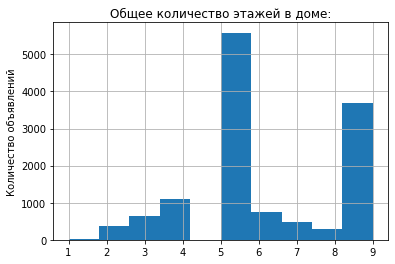

In [105]:
fig, ax = plt.subplots()

ax.hist(data['floors_total'], range=(1, 9))
ax.set_title('Общее количество этажей в доме:')
plt.ylabel('Количество объявлений');
ax.grid()

plt.show()

На этапе предобработки данных мы выявили - посмотрели в Википедии -, что дома в Питере могут быть не более 37 этажей. Также у нас была догадка про пятиэтажки. На графике действительно видно, что большинство предложений - это пятиэтажные дома. Следующим лидируют продажи в девятиэтажных домах. 

Многоэтажек сильно меньше. Это 15-ти этажные и 25-ти этажные дома. Видимо, как и в Москве, в Питере нельзя строить выше 25 этажей.

Подводя итоги под этажность дома, можно сделать вывод, что в большинстве случаев продают квартиры в относительно-старых домах. В новостройках - это высотные здания - продают, но реже. Также есть предложения в домах выше 25 этажей - это скорее всего какая-то элитная недвижимость, её меньше всего.



**Расстояние до центра города в метрах:**

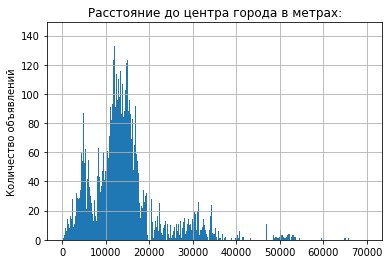

In [106]:
fig, ax = plt.subplots()

ax.hist(data['cityCenters_nearest'], bins=1000, range=(0, 70000))
ax.set_title('Расстояние до центра города в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Большинство предложений в пределах 20км. Построим гистограмму для этого диапазона, чтобы было нагляднее видно:

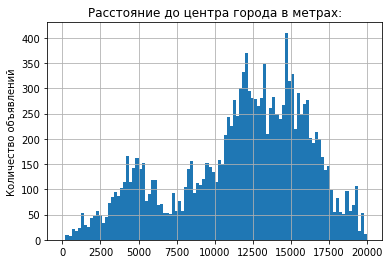

In [107]:
fig, ax = plt.subplots()

ax.hist(data['cityCenters_nearest'], bins=100, range=(0, 20000))
ax.set_title('Расстояние до центра города в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Итак, большинство квартир расположены в пределах 20км. Пик преддложений расположены в диапазоне 11 - 17 км от центра.

Также есть объявления, где квартиры расположены далее 20км от центра - таких предложений меньше. Чем дальше от центра, тем предложений меньше.

**Расстояние до ближайшего аэропорта:**

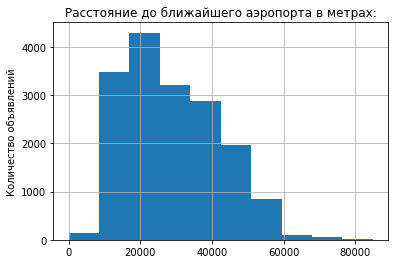

In [108]:
fig, ax = plt.subplots()

ax.hist(data['airports_nearest'])
ax.set_title('Расстояние до ближайшего аэропорта в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

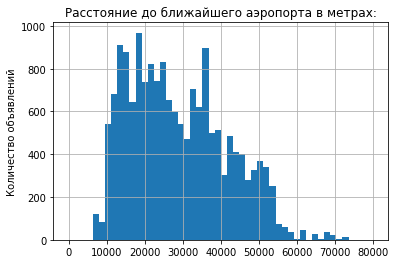

In [109]:
fig, ax = plt.subplots()

ax.hist(data['airports_nearest'], bins=50, range=(0, 80000))
ax.set_title('Расстояние до ближайшего аэропорта в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Основная масса предложений расположены в пределах 10 - 55км.

**Расстояние до ближайшего парка**

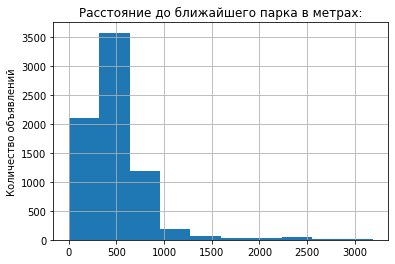

In [110]:
fig, ax = plt.subplots()

ax.hist(data['parks_nearest'])
ax.set_title('Расстояние до ближайшего парка в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

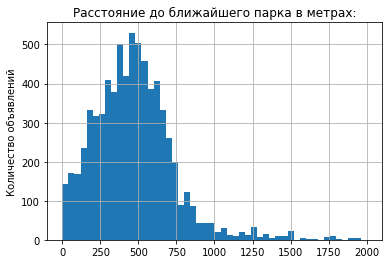

In [111]:
fig, ax = plt.subplots()

ax.hist(data['parks_nearest'], bins=50, range=(0, 2000))
ax.set_title('Расстояние до ближайшего парка в метрах:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Хорошие объявления - в большинстве случае ближайший парк в радиусе 800м. Хотя это Питер, там много парков!

**День и месяц публикации объявления:**

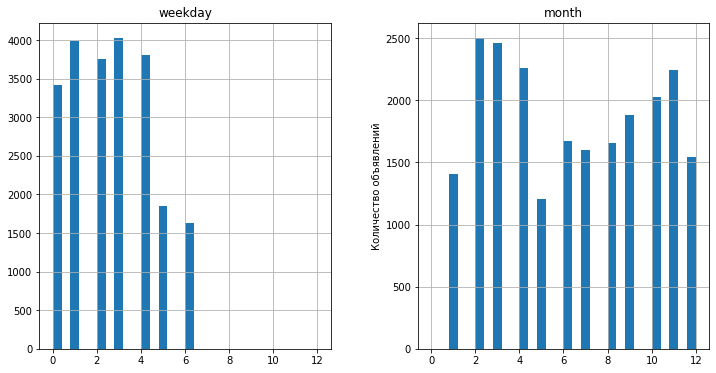

In [112]:
data[['weekday', 'month']].hist(bins = 30, range = (0, 12), figsize = (12, 6))
plt.ylabel('Количество объявлений');

Построим отдельную гистограмму для месяцев:

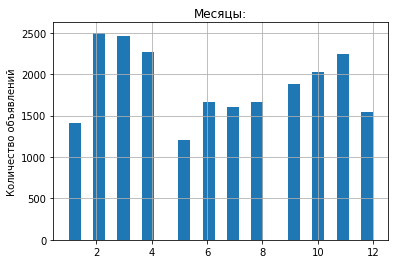

In [113]:
fig, ax = plt.subplots()

ax.hist(data['month'], bins=25, range=(1, 12))
ax.set_title('Месяцы:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Построим отдельную гистограмму для дней недели:

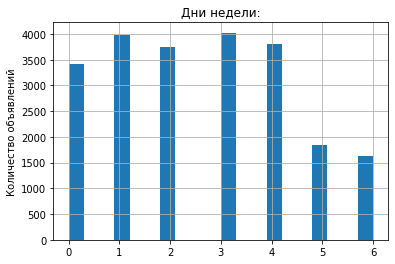

In [114]:
fig, ax = plt.subplots()

ax.hist(data['weekday'], bins=20, range=(0, 6))
ax.set_title('Дни недели:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

В мае было подано меньше всего объявлений, легко догадаться, что это вызвано большими майскими праздниками. Начиная с лета, количество предложений плавно растет до ноября. Наверное ближе к концу года люди пытаются изменить свою жизнь, сделать что-то что всё никак не могли сделать в течении года и новый год - это некоторая психологическая контрольная отметка. Начиная с декабря, прослеживается резкий спад подач - это вызвано новогодними праздниками и каникулами: кто-то уезжает, кому-то просто не до продажи квартиры. Спад длится до января - половину января тоже все отдыхают. И с февраля, когда все отошли от новогодних торжеств, выделяется самый пик продаж, который постепенно снижается к апрелю. И так далее.

По поводу дня недели можно отметить, что меньше всего было подано объявлений на выходных. Наверное в выходные лень этим заниматься. Для меня это странно, продажей квартиры я бы занялся так раз наоборот в выходной день, т.к. есть на это свободное время. Но это Питер, там всё по-другому, жизнь наверное действительно более плавная и размеренная, по отношению к Москве. В будние дни распределение практически одинаковое: в понедельник чуть меньше объявлений, во вторник и четверг чуть больше. 

### Как быстро продавались квартиры

Посмотрим как быстро продавались квартиры. Отобразим на гистограмме сколько дней было размещено объявление:

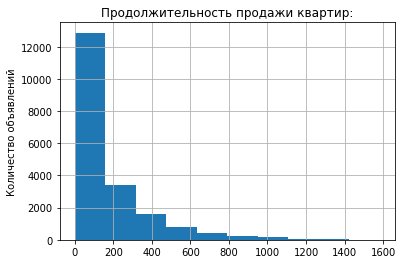

In [115]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'])
ax.set_title('Продолжительность продажи квартир:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Увеличим масштаб:

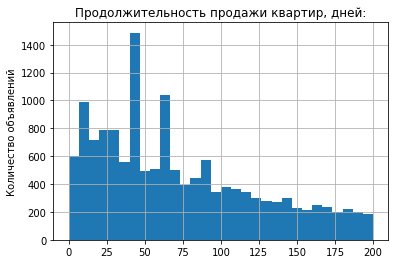

In [116]:
fig, ax = plt.subplots()

ax.hist(data['days_exposition'], bins=30, range=(0, 200))
ax.set_title('Продолжительность продажи квартир, дней:')
plt.ylabel('Количество объявлений')
ax.grid()

plt.show()

Много объявлений провисело не более двух недель. Вероятно действительно хорошие были предложения и квартиры продавались так быстро.

Также на графике явно прослеживаются отметки в 1.5, 2 и 3 месяца. Наблюдаемые всплески возможно обозначают некие границы, например, когда у человека есть потребность продать в течение двух или трех месяцев - дольше ждать не может, т.к. нужны деньги на покупку, например, другого жилья. Вполне возможно люди снижают стоимость и продают к этому времени. Также квартиры могут продавать риэлторы, у которых по договору обозначены сроки, например 45 дней или 2 и 3 месяца. 

После трех месяцев идет плавное снижение количества продаж.

Подсчитаем среднее время продажи и медианное значение:

In [117]:
print('Среднее время продажи квартир', data['days_exposition'].mean())
print('Медианное время продажи квартир:', data['days_exposition'].median())

Среднее время продажи квартир 176.2295832697298
Медианное время продажи квартир: 93.0


Среднее время 176 дней - это полгода. Медиана получилась 93 дня. 
Это может быть обусловлено договором с реэлтором, например, договор на полгода о продаже квартиры. Или люди продают без посредников и могут не торопиться с продажей, чтобы продать без снижения стоимости.

Быстрыми можно считать продажи квартир в течение первых двух недель с момента публикации объявления. 

Для подсчета необычно долгих продаж построим дополнительно диаграмму размаха, на ней посмотрим:

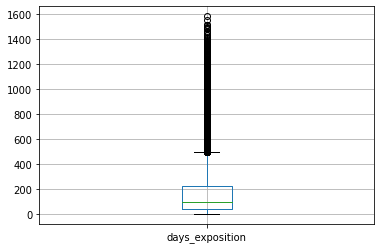

In [118]:
data.boxplot(column = 'days_exposition');

Судя по графику, необычно долгими продажами можно считать все продажи, которые висели более 500 дней. К этой группе объявлений можно отнести элитную недвижимость или кто занимается покупкой квартиры с целю дальнейшей перепродажи. Такая группа продавцов обычно ставят большой ценник и не спешат с продажей. 

### Факторы влияния на стоимость объекта

Посмотрим какие факторы влияют на стоимость квартиры. Для этого построим графики зависимости стомости квартир от следующих параметров:

   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - количество комнат;
   - этажа;
   - даты размещения

Добавим новый столбец со стоимостью квартир в млн. руб - это поможет нам в дальнейшем для чтения графиков:

In [119]:
data['last_price_mln'] = data['last_price'] / 1000000

*    Построим scatterplot для оценки зависимости между общей площадью и стоимостью квартиры:

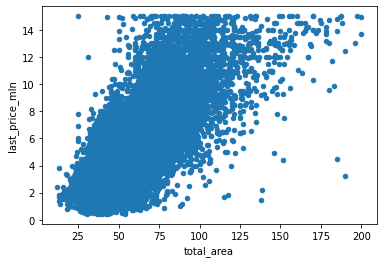

In [120]:
data.plot(x='total_area', y='last_price_mln', kind='scatter');

В дополнение построим сводный график по столбцам с общей площадью и стоимостью квартиры:

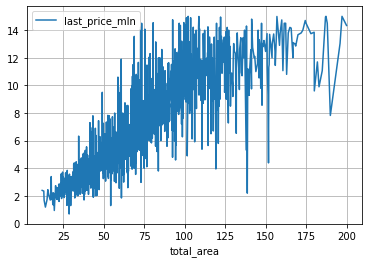

In [121]:
 data.pivot_table(index='total_area', values='last_price_mln').plot(grid=True);

Первый и второй график нам показывает справедливую зависимость - чем больше площадь, тем больше стоимость. Зависимость очевидная.

Расчитаем коэффициент корреляционной зависимости:

In [122]:
print(data['total_area'].corr(data['last_price_mln']))

0.7458842658355356


Коэффициент положительный означает, что при росте площади растет и стоимость квартиры. В этом мы также убедились, построив графики зависимости.


*    Теперь проверим взаимосвязь между жилой площадью и стоимостью квартиры. Построим аналогичные графики, как в предыдущем анализе:

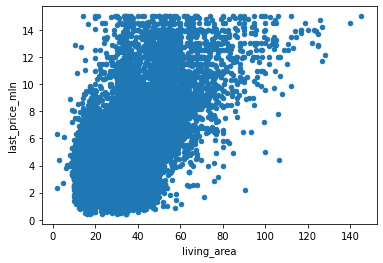

In [123]:
data.plot(x='living_area', y='last_price_mln', kind='scatter');

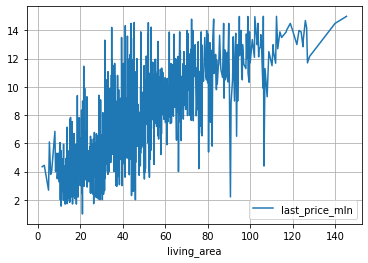

In [124]:
data.pivot_table(index='living_area', values='last_price_mln').plot(grid=True);

In [125]:
print(data['living_area'].corr(data['last_price_mln']))

0.6021243793027803


Из графиков и положительного коэффициента корреляции можно также судить о зависимости стоимости и жилой площади - чем больше жилая площадь, тем выше стоимость квартиры. 

*    Проверим взаимосвязь между площадью кухни и стоимостью квартиры. Построим аналогичные графики, как в предыдущем анализе:
    

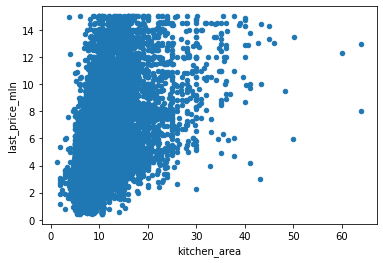

In [126]:
data.plot(x='kitchen_area', y='last_price_mln', kind='scatter');

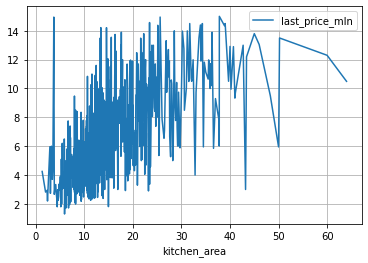

In [127]:
data.pivot_table(index='kitchen_area', values='last_price_mln').plot(grid=True);

In [128]:
print(data['kitchen_area'].corr(data['last_price_mln']));

0.5047747606713303


Из графиков и положительного коэффициента корреляции можно также судить о зависимости стоимости и площади кухни - чем больше площадь кухни, тем больше площадь самой квартиры и как следствие стоимость самой квартиры квартиры.

*    Проверим взаимосвязь между количеством комнат и стоимостью квартиры. Построим диаграмму размаха и найдем коэффициент корреляции:

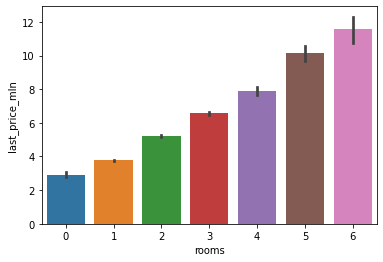

In [129]:
sns.barplot(data=data, x='rooms', y='last_price_mln');


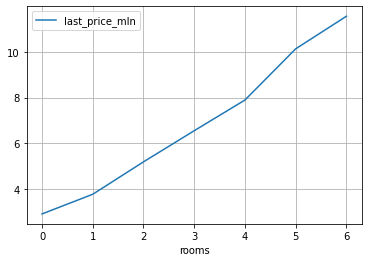

In [130]:
data.pivot_table(index='rooms', values='last_price_mln').plot(grid=True);

In [131]:
print(data['rooms'].corr(data['last_price_mln']))

0.488283862265632


Из графиков и коэффициента можно сделать вывод о взаимосвязи между количеством комнат и стоимостью квартиры - чем больше комнат, тем больше площадь квартиры и больше сама стоимость квартиры. 

Как итог в данном наблюдении самый большой фактор влияния на стоимость квартиры является его общая площадь - это логично и также подтвердили математически, получив коэффициент корреляции 0,75.

*    Проверим взаимосвязь между этажом и стоимостью квартиры. Построим те же графики:

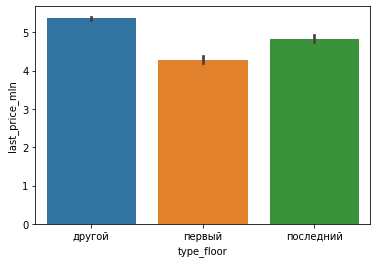

In [132]:
sns.barplot(data=data, x='type_floor', y='last_price_mln');

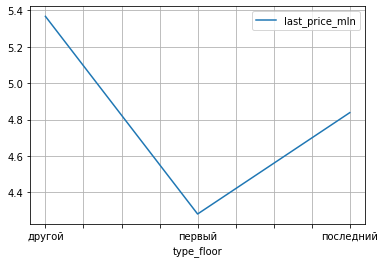

In [133]:
data.pivot_table(index='type_floor', values='last_price_mln').plot(grid=True);

Графики нам показывают следующую зависимость. 

Самые дорогие квартиры на "других этажах": между первым и последним этажом. 

На первых этажах стоимость самая маленькая - на самом деле мало кто хочет жить на первом этаже, т.к. повышается риск грабежа и все шумы со двора проникают в квартиру намного больше. 

На последних этажах стоимость выше, чем на первых этажах и ниже, чем на других этажах. 

Коэффициент корреляционной зависимости для этого анализа построить не получится, т.к. тип этажа не является числом, а без этого коэффициент не вычислить.

*    Проверим взаимосвязь между датой подачи объявления и стоимостью квартиры. 

Построим зависимость между днем недели и стоимостью квартиры:

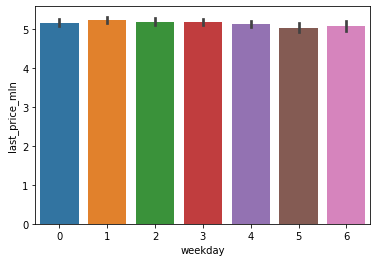

In [134]:
sns.barplot(data=data, x='weekday', y='last_price_mln');

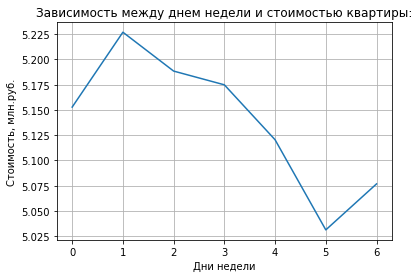

In [135]:
fig, ax = plt.subplots()

ax.plot(data.pivot_table(index='weekday', values='last_price_mln'))
ax.set_title('Зависимость между днем недели и стоимостью квартиры:') 
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Дни недели')
ax.set_ylabel('Стоимость, млн.руб.')

plt.show()

Судя по графикам и коэффициенту корреляции можно судить о следующем. 

В субботу цена объявления минимальная. В воскресенье начинает расти до вторника. Во вторник цена максимальная. После чего стоимость плавно снижается к субботе.

Разница в цене не очень заметна.

Построим зависимость между месяцем и стоимостью квартиры:

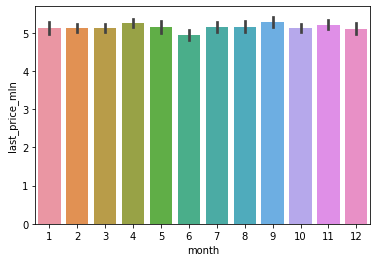

In [136]:
sns.barplot(data=data, x='month', y='last_price_mln');

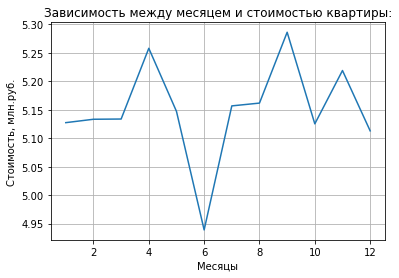

In [137]:
fig, ax = plt.subplots()

ax.plot(data.pivot_table(index='month', values='last_price_mln'))
ax.set_title('Зависимость между месяцем и стоимостью квартиры:') # добавим наименование графика
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Месяцы')
ax.set_ylabel('Стоимость, млн.руб.')

plt.show()

Итак, в июне можно выделить минимальную стоимость предложений. Цена ниже стоимости апреля примерно на 300тыс.руб. В сентябре стоимость самая дорогая.


Построим зависимость между годом и стоимостью квартиры:

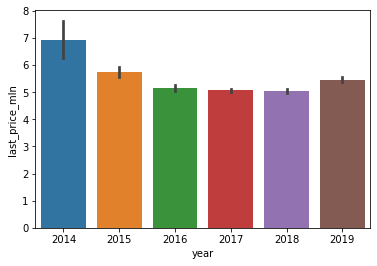

In [138]:
sns.barplot(data=data, x='year', y='last_price_mln');

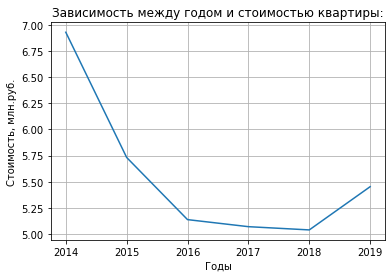

In [139]:
fig, ax = plt.subplots()

ax.plot(data.pivot_table(index='year', values='last_price_mln'))
ax.set_title('Зависимость между годом и стоимостью квартиры:') # добавим наименование графика
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Годы')
ax.set_ylabel('Стоимость, млн.руб.')

plt.show()

За всю историю объявлений самая высокая стоимость жилья была в 2014 году. Стоимость снижалась к 2018 году. В 2018 году стоимость предложений была минимальная. После 2018-го да заметен рост цен. 

### Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Подсчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Спомощью функции pivot_table сгруппируем данные по населенным пунктам и подсчитаем среднюю стоимость квадратного метра и количество объявлений для каждого населенного пункта. Для этого создадим вспомогательный датафрейм top_10:


In [140]:
top_10 = data.pivot_table( \
        index = 'locality_name',
        values = 'square_meter_price', 
        aggfunc = ({'square_meter_price': 'mean',
                    'locality_name': 'count'}))

top_10

,locality_name,square_meter_price
locality_name,,
-,45,89728.575692
Агалатово,4,71214.470963
Александровская,2,70262.807084
Алексеевка,1,22222.222222
Аннино,16,63322.637137
...,...,...
Юкки,5,77948.151865
Ялгино,1,17659.090909
Яльгелево,6,56219.495724


Переименуем наименования получившихся столбцов, для последующей группировки:

In [141]:
top_10.rename(columns = {'locality_name': 'amount'}, inplace = True )

Отсортируем top_10 по убыванию числа населенных пунктов и выведем топ 10 таких населенных пунктов:

In [142]:
top_10.sort_values(by='amount', ascending=False).head(10)

,amount,square_meter_price
locality_name,,
Санкт-Петербург,14542,107290.483731
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,397,67214.252635
Пушкин,351,101197.271132
Колпино,337,75333.295801
Парголово,326,90332.263023
Гатчина,307,68746.146763


Данная таблица отражает среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

Визуализируем таблицу с помощью barplot:

In [143]:
top_10_price = top_10.sort_values(by='amount', ascending=False).head(10)


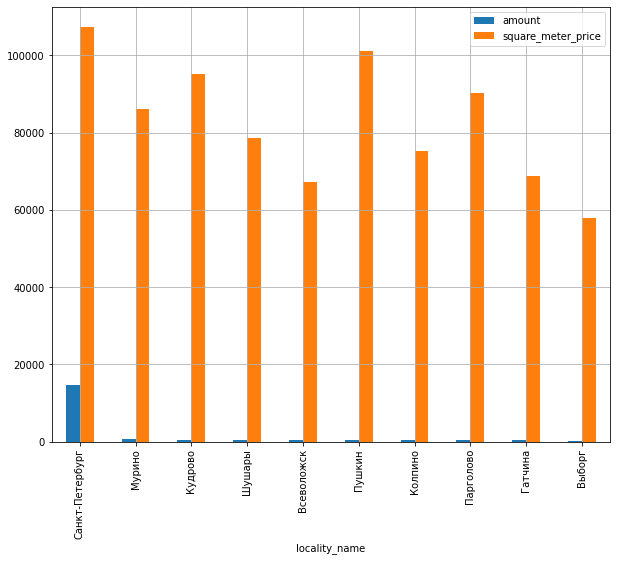

In [144]:
top_10_price.plot.bar(figsize=(10, 8), grid=True);

Видим, что самая дорогая стоимость жилья из top_10 в Санкт-Петербурге. Чуть дешевле в Пушкине. В Выборге самая низкая стоимость.


Далее выведем населенные пункты из top_10 с самой высокой и низкой стоимостью квадратного метра.

Для подсчета самой высокой стоимости квадратного метра из top_10 создадим вспомогательный датафрейм top_10_price:


In [145]:
top_10_price = top_10.sort_values(by='amount', ascending=False).head(10)

In [146]:
top_10_price.query('square_meter_price == square_meter_price.max()')

,amount,square_meter_price
locality_name,,
Санкт-Петербург,14542,107290.483731


Что и требовалось доказать - стоимость в Питере самая большая.

Теперь найдем стоимость самого дешевого жилья из top_10:

In [147]:
top_10_price.query('square_meter_price == square_meter_price.min()')

,amount,square_meter_price
locality_name,,
Выборг,236,57932.878606


В Выборге оказалась наименьшая стоимость квадратного метра из top_10.

Теперь найдем стоимость самого дорогого и дешевого жилья во всем датафрейме data:

In [148]:
top_10.query('square_meter_price == square_meter_price.max()')

,amount,square_meter_price
locality_name,,
Санкт-Петербург,14542,107290.483731


Санкт-Петербург по-прежнему лидирует по стоимости квадратного метра. 

Ниже вычислим населенный пункт с самой низкой стоимостью квадратного метра:

In [149]:
top_10.query('square_meter_price == square_meter_price.min()')

,amount,square_meter_price
locality_name,,
Старополье,3,11206.221198


В Старополье оказалась самая низкая стоимость квадратного метра. Таких объявлений было всего 3шт.

### Средняя цена каждого километра

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

Сделаем вспомогательный датафрейм data_St_Petersburg, в который добавим все объявления в Санкт-Петербурге:

In [150]:
data_St_Petersburg = data.query('locality_name == "Санкт-Петербург"')

Дальше сделаем группировку по километрам и подсчитаем среднюю стоимость квадратного метра:

In [151]:
St_Petersburg_price = data_St_Petersburg.pivot_table(index = 'cityCenters_nearest_km', values = 'square_meter_price')
St_Petersburg_price

,square_meter_price
cityCenters_nearest_km,
0.0,118752.879316
1.0,123133.496942
2.0,121232.347086
3.0,111072.293714
4.0,117814.232856
5.0,122253.589876
6.0,124790.913584
7.0,119766.768821
8.0,119286.668135


Построим график зависимости стоимости квадратного метра от удаления от центра:

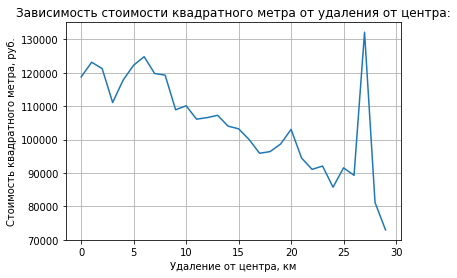

In [152]:
fig, ax = plt.subplots()

ax.plot(St_Petersburg_price)
ax.set_title('Зависимость стоимости квадратного метра от удаления от центра:')
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Удаление от центра, км')
ax.set_ylabel('Стоимость квадратного метра, руб.')

plt.show()

Из графика и таблицы выше делаем очевидный вывод о том, что чем ближе к центру, тем стоимость жилья выше. Судя по графику, центр города заканчивается на 10-ом километре.
Наблюдаем на графике всплекс на 27-ом километре - это возможно попала элитная недвижимость. 

## Общий вывод

[Назад к содержанию](#Содержание)

В данном проекте мы анализировали архив объявлений от сервиса `Яндекс Недвижимость` о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 

Сперва выполнили предобработку данных:

   - нашли пропуски в данных;
   - заполнили пропуски;
   - изменили типы столбцов для возможности вычислений с этими столбцами;
   - выявили неявные дубликаты и удалили их;
   - нашли уникальные значения и либо исключили их из датасета, либо привели к предполагаемым значениям.

Для анализа данных добавили в датафрейм дополнительные столбцы:

   - стоимость одного квадратного метра;
   - день недели публикации объявления;
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры;
   - расстояние до центра города в километрах.
    
Провели исследовательский анализ данных. Изучили следующие параметры:

   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - этаж квартиры;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего аэропорта;
   - расстояние до ближайшего парка;
   - день и месяц публикации объявления.
    
Построили отдельные гистограммы для каждого из этих параметров. Пришли к следующим выводам, что больше всего предложений о продаже квартир: 

   - большинство объявлений с площадью в пределах 100м2; 
   - больше всего квартир с общей площадью порядка 40 - 45м2;
   - средняя стоимость квартиры состовляет 5 млн.руб.;
   - в основном продают однокомнатные и двухкомнатные квартиры;
   - больше всего предложений на этажах, расположенных между первым и последним этажом;
   - меньше объявлений на 1-ом этаже;
   - на первых этажах самые дешевые предложения;
   - на последних этажах стоимость дороже, чем на первых этажах;
   - квартиры, расположенные между первым и последним этажом самые дорогие;
   - большинство квартир расположены в пятиэтажных и девятиэтажных квартирах;
   - большинство квартир расположены в пределах 20км от центра;
   - пик преддложений расположены в диапазоне 11 - 17 км от центра;
   - в пределах 10 - 55 км от аэропорта;
   - в пределах 800 м от ближайшего парка;
   - средняя продолжительность продажи квартиры составляет полгода;
   - медианное время продажи квартиры составляет 93 дня;
   - основными факторами, влияющими на стоимость квартиры, являются его общая площадь и расстояние до центра;
   - больше всего объявлений из Санкт-Петербурга;
   - средняя стоимость квадратного метра в Питере составляет 107 290руб;
   - самая низкая стоимость из топ-10 самых распространенных населенных пунктов в Выборге - 57 932руб.
    
    